,a,b,c,d
0,True,False,False,False
1,False,True,False,False
2,False,False,True,False
3,False,False,False,True


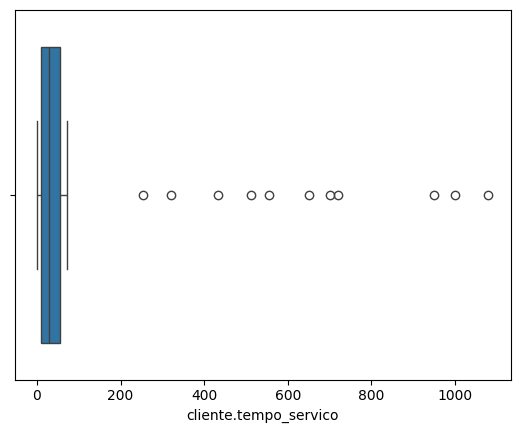

In [38]:
import pandas as pd

url = 'dataset-telecon.json'

dados = pd.read_json(url)
dados = pd.json_normalize(dados.columns)

import json

with open('dataset-telecon.json') as f:
  json_bruto = json.load(f)

dados_normalizados = pd.json_normalize(json_bruto)

dados_normalizados


dados_normalizados[dados_normalizados['conta.cobranca.Total'] == ' '].head()


dados_normalizados[dados_normalizados['conta.cobranca.Total'] == ' '][
    ['cliente.tempo_servico', 'conta.contrato', 'conta.cobranca.mensal', 'conta.cobranca.Total']
]

idx = dados_normalizados[dados_normalizados['conta.cobranca.Total'] == ' '].index

dados_normalizados.loc[idx, "conta.cobranca.Total"] = dados_normalizados.loc[idx, "conta.cobranca.mensal"] * 24

dados_normalizados.loc[idx, "cliente.tempo_servico"] = 24

dados_normalizados.loc[idx][
    ['cliente.tempo_servico', 'conta.contrato', 'conta.cobranca.mensal', 'conta.cobranca.Total']
]

dados_normalizados['conta.cobranca.Total'] = dados_normalizados['conta.cobranca.Total'].astype(float)

dados_normalizados.query("Churn == ''")

dados_sem_vazio = dados_normalizados[dados_normalizados['Churn'] != ''].copy()

dados_sem_vazio.reset_index(drop=True, inplace=True)

dados_normalizados.isnull().sum().sum()

dados_normalizados[dados_normalizados.isna().any(axis=1)]

dados_normalizados.dropna(inplace=True)

dados_normalizados.duplicated()

dados_normalizados.describe()

import seaborn as sns

sns.boxplot(x=dados_normalizados['cliente.tempo_servico'])

Q1 = dados_normalizados['cliente.tempo_servico'].quantile(.25)
Q3 = dados_normalizados['cliente.tempo_servico'].quantile(.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5*IQR
limite_superior = Q3 + 1.5*IQR

outliers_index = (dados_normalizados['cliente.tempo_servico'] < limite_inferior) |  (dados_normalizados['cliente.tempo_servico'] > limite_superior)

dados_normalizados[outliers_index]['cliente.tempo_servico']


s = pd.Series(list('abcd'))
pd.get_dummies(s)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')